# Ciência dos Dados - 2°Semestre - Engenharia
#### Carlos Eduardo Dip

## Tema: Desenvolvimento econômico de países dentro e fora do Mercado Comun do Sul (Mercosul)

#### Hipótese:
Países que fazem parte da união aduaneira devem ter mercados em maior crescimento do que os que não estão, como sugerido na pesquisa "Os impactos do Mercosul sobre o comérico: Uma abordagem gravitacional" de Bruno Ferreira Cordeiro, da USP.  
< https://www.teses.usp.br/teses/disponiveis/12/12138/tde-06092016-144804/publico/CorrigidaBruno.pdf > Acesso em 26/8/2019 às 18h40min.

#### Mecanismo:
Espera-se que, devido ao propósito da União Aduaneira, o comércio entre países participantes seja ampliado, ou menos deixe de ser reduzido, aumentando a competitividade com produtos importados de páises externos à união, através principalmente de reduções tributárias. Isso, por sua vez impulsionaria o crescimento economico dos países envolvidos, e também os protegeria de recessões.

Os dados analisados foram retirados do banco de dados https://www.gapminder.org/data/.

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit

data_GDP = pd.read_excel('Data/gdp.xlsx').rename({'country':'Country'},axis = 1 ).set_index('Country')
data_income = pd.read_excel('Data/income.xlsx').rename({'country':'Country'},axis = 1 ).set_index('Country')
for year in range(1800, 1930):
    if year in data_GDP and year != 1800:
        del data_GDP[year]
    if year in data_income:
        del data_income[year]
for year in range(2014,2041):
    if year in data_income:
        del data_income[year]
        
Mercosul = ["Brazil",
            "Argentina",
            "Uruguay",
            "Paraguay"]

Non_Mercosul = ["Bolivia",
                "Colombia",
                "Chile",
                "Venezuela",
                "Ecuador",
                "Peru"]
all_south = Non_Mercosul+Mercosul

bool_series_1 = [country in all_south for country in data_GDP.index.tolist()]
data_GDP = data_GDP.loc[bool_series_1]
data_GDP["Mercosul"] = [int(country in Mercosul) for country in data_GDP.index.tolist()]

bool_series_2 = [country in all_south for country in data_income.index.tolist()]
data_income = data_income.loc[bool_series_2]
data_income["Mercosul"] = [int(country in Mercosul) for country in data_income.index.tolist()]

data_all = data_income.join(data_GDP, how = 'left', rsuffix = "_GDP", lsuffix = '_income')

## Análise exploratória inicial

#### Primeira visualização dos dados 
Aqui, constroem-se gráficos para facilitar a visualização da informação disponível, com intuito de conhecer melhor o comportamento das variáveis envolvidas, e dos dados em geral.

In [127]:
data_income

,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Mercosul
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,7650,6920,6510,6640,6990,7110,7010,7360,7220,7330,...,15500,16600,17900,18400,17200,18700,19600,19200,19500,1
Bolivia,2430,2460,2480,2510,2530,2560,2580,2610,2630,2660,...,4700,4840,4970,5190,5280,5410,5600,5790,6090,0
Brazil,2000,1870,1900,2010,2130,2140,2330,2370,2410,2400,...,12300,12600,13300,13800,13700,14500,15000,15100,15400,1
Chile,4130,3200,2660,3210,3810,3950,4070,4540,4500,4510,...,17000,17900,18600,19000,18500,19400,20400,21300,22000,0
Colombia,2320,2240,2350,2440,2550,2560,2650,2650,2770,2850,...,9260,9760,10300,10500,10600,10900,11500,11800,12300,0
Ecuador,1720,1760,1810,1850,1900,1940,1980,2030,2070,2110,...,8610,8840,8880,9290,9180,9350,9930,10300,10700,0
Paraguay,3290,3330,3360,3400,3440,3480,3520,3560,3610,3650,...,6120,6320,6570,6890,6530,7290,7510,7310,8230,1
Peru,3760,3370,3160,3430,3790,4050,4140,4090,4050,3970,...,7600,8070,8650,9320,9310,9960,10400,10900,11400,0
Uruguay,9310,7480,6750,5740,6650,6850,6980,6910,7250,7200,...,13000,13500,14300,15300,15900,17100,17900,18500,19300,1


In [128]:
data_GDP

,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Mercosul
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,-4.440,-6.73,-3.35,4.67,7.80,4.16,0.907,7.51,0.45,4.2000,...,9.08,8.21,8.39,6.50,0.598,8.88,8.59,1.64,3.98,1
Bolivia,2.090,2.12,2.10,2.13,2.12,2.10,2.090,2.12,2.10,2.0900,...,4.40,4.42,4.16,5.73,2.970,3.77,4.81,4.85,6.46,0
Brazil,-2.010,-3.58,4.40,9.23,9.13,3.10,12.200,4.69,4.49,2.4600,...,2.76,3.96,6.09,5.17,-0.330,7.53,2.73,1.09,2.24,1
Chile,-16.000,-21.20,-15.50,23.20,20.70,5.75,4.920,13.70,1.15,2.1000,...,6.36,5.83,5.20,3.04,-0.910,5.73,5.92,5.45,4.21,0
Colombia,-0.884,-1.63,6.69,5.67,6.35,2.46,5.340,1.56,6.57,6.2300,...,5.31,7.03,7.22,3.83,1.910,4.20,6.83,4.36,4.37,0
Ecuador,1.460,3.27,3.40,2.83,2.79,3.26,3.060,2.82,3.12,3.0600,...,5.22,4.51,2.24,6.36,0.997,3.19,7.87,4.81,3.92,0
Paraguay,3.600,3.66,3.60,3.66,3.60,3.55,3.700,3.65,3.69,3.6300,...,2.29,4.68,5.26,6.16,-4.160,12.80,4.10,-1.25,13.00,1
Peru,-11.500,-8.09,-3.83,11.30,13.50,9.38,4.800,1.35,1.57,0.5410,...,6.17,7.28,7.81,9.27,0.377,8.30,6.45,5.85,4.61,0
Uruguay,13.700,-17.30,-7.17,-12.50,19.10,5.89,4.750,1.79,7.89,0.0139,...,6.12,3.98,6.50,7.18,2.430,8.88,5.67,3.92,4.20,1


In [129]:
data_all

,1930_income,1931_income,1932_income,1933_income,1934_income,1935_income,1936_income,1937_income,1938_income,1939_income,...,2005_GDP,2006_GDP,2007_GDP,2008_GDP,2009_GDP,2010_GDP,2011_GDP,2012_GDP,2013_GDP,Mercosul_GDP
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,7650,6920,6510,6640,6990,7110,7010,7360,7220,7330,...,9.08,8.21,8.39,6.50,0.598,8.88,8.59,1.64,3.98,1
Bolivia,2430,2460,2480,2510,2530,2560,2580,2610,2630,2660,...,4.40,4.42,4.16,5.73,2.970,3.77,4.81,4.85,6.46,0
Brazil,2000,1870,1900,2010,2130,2140,2330,2370,2410,2400,...,2.76,3.96,6.09,5.17,-0.330,7.53,2.73,1.09,2.24,1
Chile,4130,3200,2660,3210,3810,3950,4070,4540,4500,4510,...,6.36,5.83,5.20,3.04,-0.910,5.73,5.92,5.45,4.21,0
Colombia,2320,2240,2350,2440,2550,2560,2650,2650,2770,2850,...,5.31,7.03,7.22,3.83,1.910,4.20,6.83,4.36,4.37,0
Ecuador,1720,1760,1810,1850,1900,1940,1980,2030,2070,2110,...,5.22,4.51,2.24,6.36,0.997,3.19,7.87,4.81,3.92,0
Paraguay,3290,3330,3360,3400,3440,3480,3520,3560,3610,3650,...,2.29,4.68,5.26,6.16,-4.160,12.80,4.10,-1.25,13.00,1
Peru,3760,3370,3160,3430,3790,4050,4140,4090,4050,3970,...,6.17,7.28,7.81,9.27,0.377,8.30,6.45,5.85,4.61,0
Uruguay,9310,7480,6750,5740,6650,6850,6980,6910,7250,7200,...,6.12,3.98,6.50,7.18,2.430,8.88,5.67,3.92,4.20,1


In [130]:
data_GDP_Merco = data_GDP.loc[data_GDP['Mercosul'] == 1]
del data_GDP_Merco['Mercosul']
series_GDP_1 = data_GDP_Merco.mean(axis=0, skipna = True)

data_GDP_no_Merco = data_GDP.loc[data_GDP['Mercosul'] == 0]
del data_GDP_no_Merco['Mercosul']
series_GDP_2 = data_GDP_no_Merco.mean(axis=0, skipna = True)



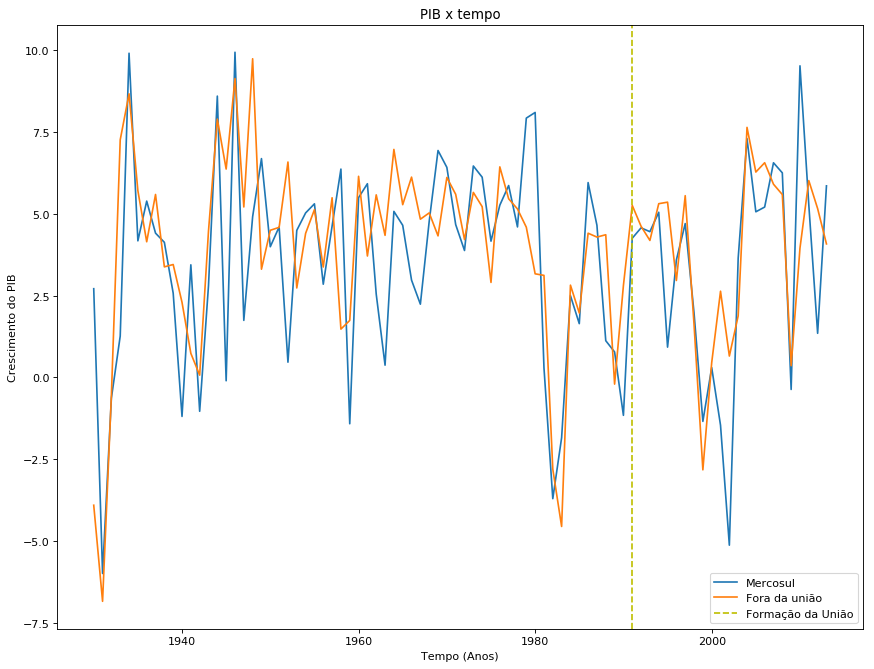

In [131]:
plt.figure(num=None, figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(1930,2014), series_GDP_1, label = "Mercosul")
plt.plot(range(1930,2014), series_GDP_2, label = "Fora da união")
plt.xlabel('Tempo (Anos)')
plt.ylabel('Crescimento do PIB')
plt.title('PIB x tempo')
plt.axvline(1991, ls = 'dashed', c = 'y', label = 'Formação da União')
plt.legend()
plt.show()

In [132]:
data_income_Merco = data_income.loc[data_income['Mercosul'] == 1]
del data_income_Merco['Mercosul']
series_income_1 = data_income_Merco.mean(axis=0, skipna = True)

data_income_no_Merco = data_income.loc[data_income['Mercosul'] == 0]
del data_income_no_Merco['Mercosul']
series_income_2 = data_income_no_Merco.mean(axis=0, skipna = True)


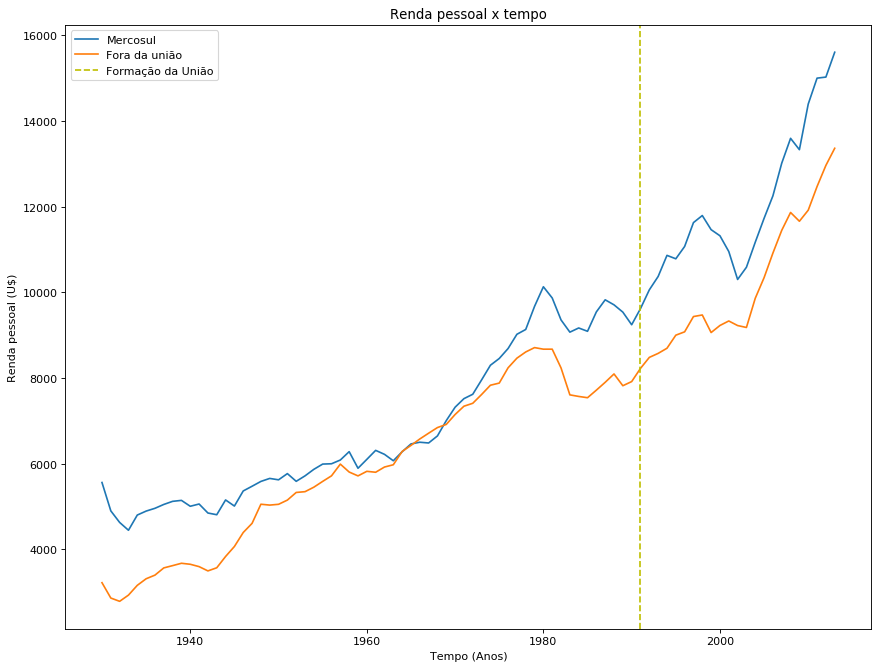

In [133]:
plt.figure(num=None, figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(1930,2014), series_income_1, label = "Mercosul")
plt.plot(range(1930,2014), series_income_2, label = "Fora da união")
plt.xlabel('Tempo (Anos)')
plt.ylabel('Renda pessoal (U$)')
plt.title('Renda pessoal x tempo')
plt.axvline(1991, ls = 'dashed', c = 'y', label = 'Formação da União')
plt.legend()
plt.show()

In [134]:
series_GDP_1.corr(series_GDP_2)

0.6573118295494053

In [135]:
series_income_1.corr(series_income_2)

0.9705892875052825

In [136]:
data_GDP_Merco = data_GDP.loc[data_GDP['Mercosul'] == 1]
del data_GDP_Merco['Mercosul']
series_GDP_1 = data_GDP_Merco.mean(axis=0, skipna = True)

data_GDP_no_Merco = data_GDP.loc[data_GDP['Mercosul'] == 0]
del data_GDP_no_Merco['Mercosul']
series_GDP_2 = data_GDP_no_Merco.mean(axis=0, skipna = True)

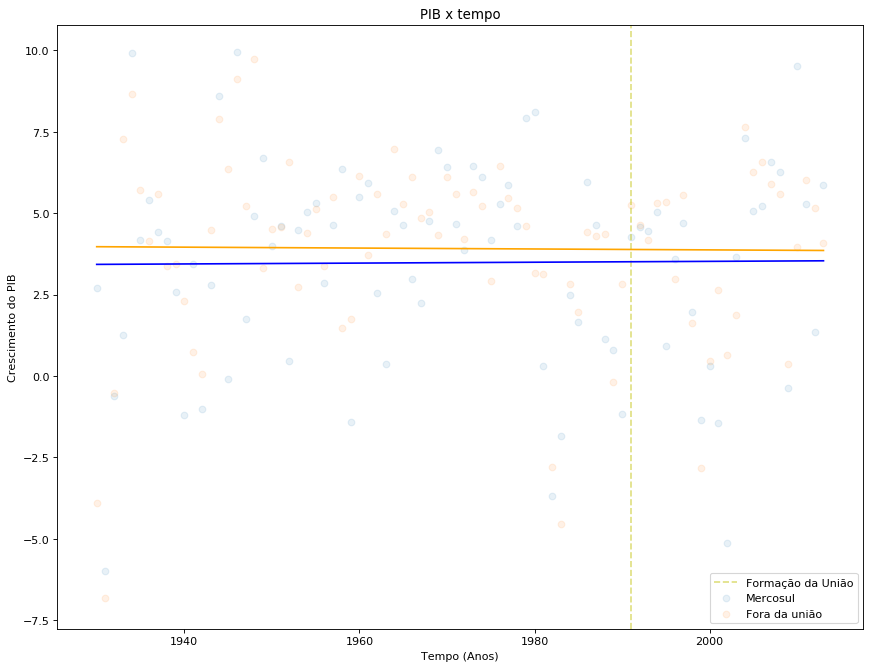

In [142]:
plt.figure(num=None, figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(range(1930,2014), series_GDP_1, label = "Mercosul", alpha = 0.1)
plt.scatter(range(1930,2014), series_GDP_2, label = "Fora da união", alpha = 0.1)
plt.xlabel('Tempo (Anos)')
plt.ylabel('Crescimento do PIB')
plt.title('PIB x tempo')
plt.axvline(1991, ls = 'dashed', c = 'y', label = 'Formação da União', alpha = 0.5)
plt.legend()
y_1 = series_GDP_1
x_1 = range(1930,2014) 
b_1, m_1 = polyfit(x_1, y_1, 1)
plt.plot(x_1, b_1 + m_1 * x_1, '-', color="blue")
y_2 = series_GDP_2
x_2 = range(1930,2014) 
b_2, m_2 = polyfit(x_2, y_2, 1)
plt.plot(x_2, b_2 + m_2 * x_2, '-', color="orange")
plt.show()

In [138]:
data_income_Merco = data_income.loc[data_income['Mercosul'] == 1]
del data_income_Merco['Mercosul']
series_income_1 = data_income_Merco.mean(axis=0, skipna = True)

data_income_no_Merco = data_income.loc[data_income['Mercosul'] == 0]
del data_income_no_Merco['Mercosul']
series_income_2 = data_income_no_Merco.mean(axis=0, skipna = True)


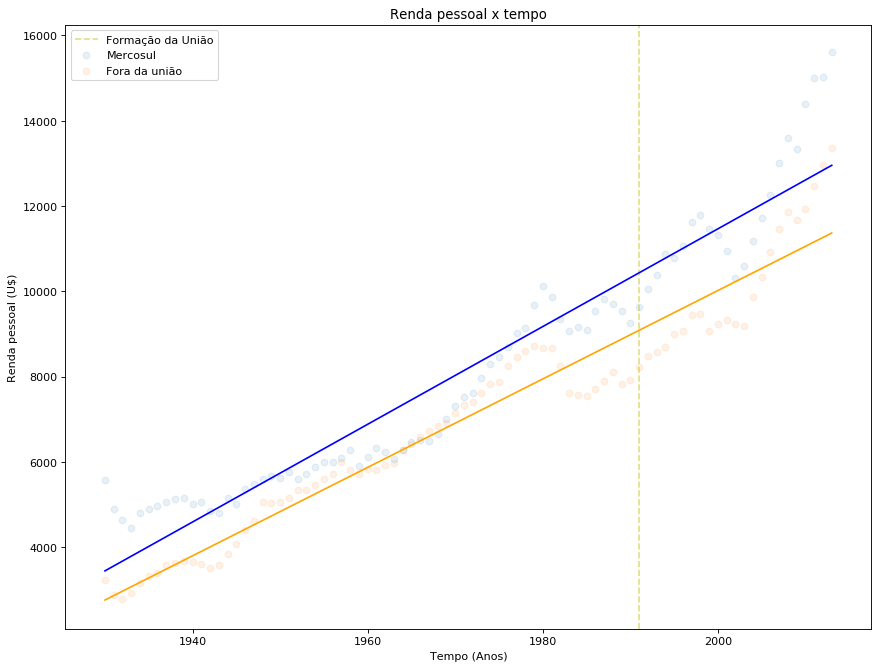

In [139]:
plt.figure(num=None, figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(range(1930,2014), series_income_1, label = "Mercosul", alpha = 0.1)
plt.scatter(range(1930,2014), series_income_2, label = "Fora da união", alpha = 0.1)
plt.xlabel('Tempo (Anos)')
plt.ylabel('Renda pessoal (U$)')
plt.title('Renda pessoal x tempo')
plt.axvline(1991, ls = 'dashed', c = 'y', label = 'Formação da União', alpha = 0.5)
plt.legend()
y_1 = series_income_1
x_1 = range(1930,2014) 
b_1, m_1 = polyfit(x_1, y_1, 1)
plt.plot(x_1, b_1 + m_1 * x_1, '-', color="blue")
y_2 = series_income_2
x_2 = range(1930,2014) 
b_2, m_2 = polyfit(x_2, y_2, 1)
plt.plot(x_2, b_2 + m_2 * x_2, '-', color="orange")
plt.show()